<a href="https://colab.research.google.com/github/vadaliah/CS5260/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/Colab\ Notebooks/HW3_Full

/content/gdrive/MyDrive/Colab Notebooks/HW3_Full


In [2]:
! pip install torch_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torch_utils: filename=torch_utils-0.1.2-py3-none-any.whl size=6202 sha256=4a4cf385d8c87f32d00a4fae055af5aed58f63504e0d68d34ea32172e274d610
  Stored in directory: /root/.cache/pip/wheels/b9/ae/b4/56ed29da706ea5e0f79157a9b158aad24bfabd045ef42eed75
Successfully built torch_utils


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import cuda
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, sampler
import torch.nn.functional as F
from torch_utils import AverageMeter
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy import inf


from sklearn.model_selection import train_test_split
import os
from glob import glob
from torchvision import transforms
from torchvision import datasets
from torchvision import models
from torch import optim, cuda, Tensor
import tqdm
from torch.utils.data import Dataset, DataLoader

# Data science tools
import numpy as np

import os

# Image manipulations
from PIL import Image
from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
#plt.rcParams['font.size'] = 14

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Text(0, 0.5, 'Total Loss')

Text(0.5, 0, 'learning rate')

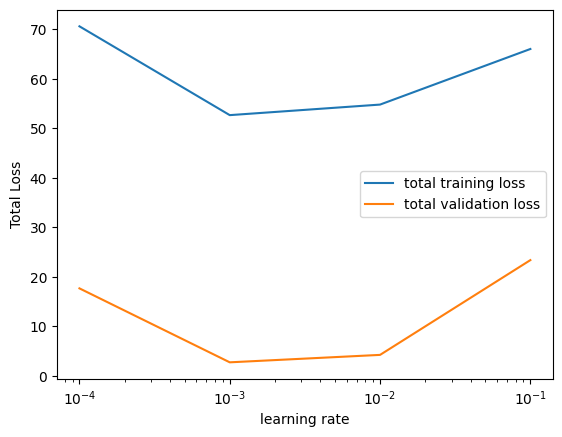

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

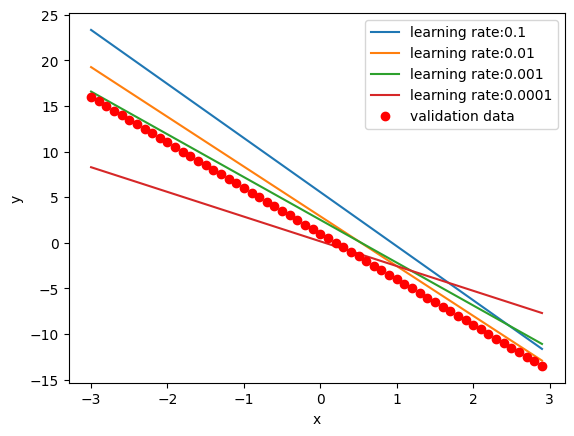

In [4]:
# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self, train=True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        # adding some outliers
        if train == True:
            self.y[10:12] = 0
            self.y[30:35] = 25
        else:
            pass
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len
 
train_set = Build_Data()
val_set = Build_Data(train=False)
 
criterion = torch.nn.MSELoss()
trainloader = DataLoader(dataset=train_set, batch_size=1)
 
learning_rates = [0.1, 0.01, 0.001, 0.0001]
train_err = torch.zeros(len(learning_rates))
val_err = torch.zeros(len(learning_rates))
Models = []
 
epochs = 20
 
# iterate through the list of various learning rates 
for i, learning_rate in enumerate(learning_rates):
    model = torch.nn.Linear(1, 1)
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    for epoch in range(epochs):
        for x, y in trainloader:
            y_hat = model(x)
            loss = criterion(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
 
    # training data
    Y_hat = model(train_set.x)
    train_loss = criterion(Y_hat, train_set.y)
    train_err[i] = train_loss.item()
 
    # validation data
    Y_hat = model(val_set.x)
    val_loss = criterion(Y_hat, val_set.y)
    val_err[i] = val_loss.item()
    Models.append(model)
 
plt.semilogx(np.array(learning_rates), train_err.numpy(), label = 'total training loss')
plt.semilogx(np.array(learning_rates), val_err.numpy(), label = 'total validation loss')
plt.ylabel('Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()
 
# plotting the predictions on validation data
for model, learning_rate in zip(Models, learning_rates):
    yhat = model(val_set.x)
    plt.plot(val_set.x.numpy(), yhat.detach().numpy(), label = 'learning rate:' + str(learning_rate))
plt.plot(val_set.x.numpy(), val_set.func.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
# define model
class bmodel(nn.Module):
    def __init__(self, input_d, hidden_d, output_d):
        super().__init__()
        # Define all the layers that you need in your network
        # You can use nn.Linear() to define the linear layer
        # You can use nn.Dropout() to define the dropout layer
        # You can use F.relu() to define your ReLu layer
       # Weights and biases can be create using nn.Parameter, which has requires_grad
        
        self.w00 = nn.Parameter(torch.randn(1), requires_grad=True)
        self.b00 = nn.Parameter(torch.randn(1), requires_grad=True)
        # num of ws = num of inputs
        # num of bs = 1 for each neuron
        self.w01 = nn.Parameter(torch.randn(1), requires_grad=True)
        self.b01 = nn.Parameter(torch.randn(1), requires_grad=True)
                
        self.w10 = nn.Parameter(torch.randn(1), requires_grad=True)
        self.w11 = nn.Parameter(torch.randn(1), requires_grad=True)
        self.b10 = nn.Parameter(torch.randn(1), requires_grad=True)

    def forward(self, x):
        # Design your network structure here
          h00 = x * self.w00 + self.b00
          h00_out = F.relu(h00)
   
          h01 = x * self.w01 + self.b01
          h01_out = F.relu(h01)
          h1 = h00_out * self.w10 + h01_out * self.w11 + self.b10
   
   # Since the model is binary classification, we apply sigmoid
          output = torch.sigmoid(h1)
   
          return output


In [10]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return bmodel(input_size, hidden_size, num_classes)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

toy_model = init_toy_model()
train_X, train_Y = init_toy_data()
validation_X, validation_Y = init_toy_data()

In [5]:
# Check whether there is a gpu for cuda
import torch
train_on_gpu = torch.cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')

# Number of gpus
if train_on_gpu:
    gpu_count = torch.cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False
else:
    multi_gpu = False
print(train_on_gpu,multi_gpu)

Train on gpu: True
1 gpus detected.
True False


In [2]:
import torch
# torch.linspace() creates the sequence of numbers between start and end, inclusively
toy_inputs = torch.linspace(start=100000, end=500000, steps=10) # same # of inputs
# [100000, 150000, ... 500000]
toy_labels = torch.tensor([0., 0., 0., 1., 1., 0., 1., 1., 1., 1.]) # same # of outputs


################################################################################################################ 
# TODO: Uncomment code below to see the effect of feature scaling!
# X_mean = torch.mean(toy_inputs, dim=0) # Compute the mean of each feature across all samples
# X_std = torch.std(toy_inputs, dim=0) # Compute the standard deviation of each feature across all samples

# # Normalize the inputs using the mean and standard deviation
# toy_inputs = (toy_inputs - X_mean) / X_std
################################################################################################################ 


# create the ToyModel
model = ToyModel()

optimizer = SGD(model.parameters(), lr=0.05)
criterion = nn.BCEWithLogitsLoss()

previous_total_loss = 0
for epoch in range(100):

    total_loss = 0
    
    # going through my inputs
    for iteration in range(len(toy_inputs)):
        
        input_i = toy_inputs[iteration]  # x
        label_i = toy_inputs[iteration]  # y
        
        # 1 - forward pass
        output_i = model(input_i) ## calculate the neural network output for one input
        
        # 2 - compute loss
        loss = criterion(output_i.squeeze(), label_i)

        # 3 - backprop
        loss.backward() # calculates the gradient for a single value and adds it to the previous one
        
        total_loss += float(loss.item()) # add the total loss for this epoch.
        
    # early stopping
    if (total_loss < 0.5):
        print("Epoch #" + str(epoch))
        break
      
    optimizer.step() # update the parameters
    optimizer.zero_grad() # zero out the previous gradient
    

    print("Total loss: " + str(total_loss))

NameError: ignored

In [ ]:
# Datasets organization
batch_size = 1

# Transfer the data from numpy to tensor
data = {
    'train':
    TensorDataset(torch.from_numpy(train_X), torch.from_numpy(train_Y).float()),
    'valid':
    # please define your validation dataset
    ######################
    ### YOUR CODE HERE ###
    ######################
    
    #####################
    ### YOUR CODE END ###
    #####################

}
